#### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ex2data1.csv")
print(len(df))
df.head()

99


,Exam_1,Exam_2,Admission Status
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [3]:
x1 = df['Exam_1'].to_numpy()
x2 = df['Exam_2'].to_numpy()
y = df['Admission Status'].to_numpy()
x = np.array([x1,x2])

In [16]:
np.shape(x)

(2, 99)

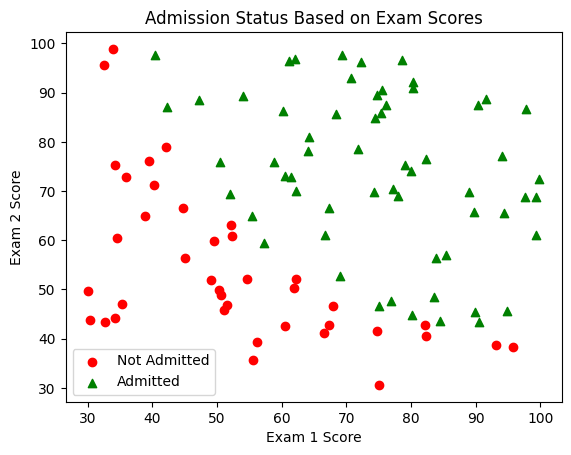

In [4]:
import matplotlib.pyplot as plt

# Plotting the data
plt.scatter(x1[y == 0], x2[y == 0], color='red', marker='o', label='Not Admitted')
plt.scatter(x1[y == 1], x2[y == 1], color='green', marker='^', label='Admitted')

# Adding labels and title
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Admission Status Based on Exam Scores')
plt.legend()

# Show plot
plt.show()


#### Prediction Function

In [5]:
def predict_y(w,x,b,m):
    y_temp = np.zeros(m)
    y_pred = np.zeros(m)
    z = np.dot(w,x) + b
    y_temp = np.divide(1, (1 + np.exp(-z)))
    for i in range(0,m):
        if y_temp[i] >= 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
                
    return y_pred

In [6]:
w = np.array([0.2,0.2])
b  = -24
m = len(y)
y_pred = predict_y(w,x,b,m)
print(f"y = {y}") 
print("\n")
print(f"y_pred = {y_pred}") 

y = [0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1
 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]


y_pred = [0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1.]


#### Cost Function

In [7]:
def calculate_cost(y, y_pred, m):
     y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Clip y_pred to avoid log(0) and log(1)
     j = (1/m) * ( - np.dot(y, np.log(y_pred)) - np.dot((1-y), np.log(1-y_pred)) )
     return j

In [8]:
cost = calculate_cost(y,y_pred,m)
print(f"cost = {cost}")

cost = 2.7910687711242113


#### Calculate Gradient

In [11]:
def calculate_grdaient(y,y_pred,m):
    diff = np.subtract(y_pred,y)
    dj_dw = (1/m) * np.dot(diff,x.T)
    dj_db = (1/m) * np.sum(diff)
    return dj_dw, dj_db

In [12]:
dj_dw, dj_db = calculate_grdaient(y,y_pred,m)
print(f"dj_dw : {dj_dw}")
print(f"dj_db : {dj_db}")

dj_dw : [4.08990715 3.77941989]
dj_db : 0.06060606060606061


#### Optimise Weights

In [12]:
def optimise_weights(w,x,b,m,alpha,iter):
    dj_dw = 0
    dj_db = 0
    w_all = np.zeros((iter,2))
    b_all = np.zeros(iter)
    cost_all = np.zeros(iter)
    
    for i in range(0,iter):
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        y_pred = predict_y(w,x,b,m)
        j = calculate_cost(y, y_pred, m)
        dj_dw, dj_db = calculate_grdaient(y,y_pred,m)
        print(f"Iteration {i}: w = {w}, b = {b:.4f}, Cost = {j:.4f}")
        w_all[i] = w
        b_all[i] = b
        cost_all[i] = j
        
    return w_all,b_all,cost_all
        

In [13]:
w = np.array([0,0])
x = np.array([x1,x2])
b  = 0
m = len(y)
alpha = 0.001
iter = 10000
w_all,b_all,cost_all = optimise_weights(w,x,b,m,alpha,iter)

Iteration 0: w = [0. 0.], b = 0.0000, Cost = 13.6065
Iteration 1: w = [-0.02067342 -0.02128072], b = -0.0004, Cost = 20.9326
Iteration 2: w = [0.02461078 0.02354134], b = 0.0002, Cost = 13.6065
Iteration 3: w = [0.00393736 0.00226063], b = -0.0002, Cost = 13.6065
Iteration 4: w = [-0.01673606 -0.01902009], b = -0.0006, Cost = 20.9326
Iteration 5: w = [0.02854814 0.02580197], b = 0.0000, Cost = 13.6065
Iteration 6: w = [0.00787472 0.00452126], b = -0.0004, Cost = 13.6065
Iteration 7: w = [-0.0127987  -0.01675946], b = -0.0008, Cost = 20.9326
Iteration 8: w = [0.0324855 0.0280626], b = -0.0002, Cost = 13.6065
Iteration 9: w = [0.01181208 0.00678188], b = -0.0005, Cost = 13.6065
Iteration 10: w = [-0.00886134 -0.01449883], b = -0.0009, Cost = 20.9326
Iteration 11: w = [0.03642286 0.03032323], b = -0.0003, Cost = 13.6065
Iteration 12: w = [0.01574944 0.00904251], b = -0.0007, Cost = 13.6065
Iteration 13: w = [-0.00492398 -0.01223821], b = -0.0011, Cost = 20.9326
Iteration 14: w = [0.040360

In [14]:
min_value = np.min(cost_all) # Finding the minimum value
min_index = np.argmin(cost_all) # Finding the position (index) of the minimum value
cost = cost_all[min_index]
w = w_all[min_index]
b = b_all[min_index]
print(f"Optimize value of w = {w}, b = {b}, with Cost = {cost} at iteration {min_index}")

Optimize value of w = [0.00640627 0.00574365], b = -0.725060606060579, with Cost = 2.4421841651409704 at iteration 9907


In [15]:
w = np.array([0.00640627, 0.00574365])
b  = -0.725060606060579
m = len(y)
y_pred = predict_y(w,x,b,m)
print(f"y = {y}") 
print("\n")
print(f"y_pred = {y_pred}")

y = [0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1
 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]


y_pred = [0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1.]


#### Calculate Accuracy

In [17]:
def Calculate_Accuracy(y,y_pred):
    count = 0
    for i in range(0,99):
        if (y[i] == y_pred[i]):
            count = count + 1
    accuracy = (count/len(y)) * 100
    return accuracy

In [18]:
accuracy =  Calculate_Accuracy(y,y_pred)
print(f" Total Count where Actual and predicted are same : {accuracy}")

 Total Count where Actual and predicted are same : 92.92929292929293


#### Loss Function

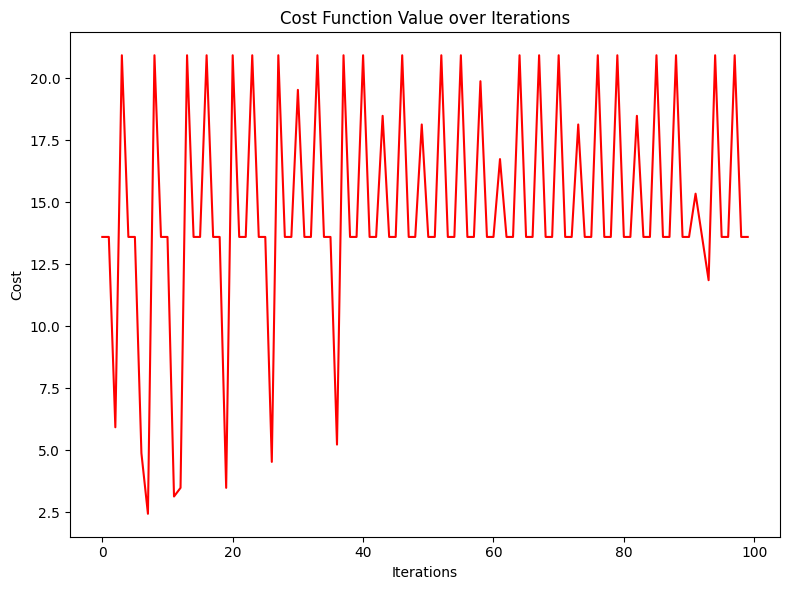

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the weight values over iterations
plt.figure(figsize=(8, 6))

# Plot for cost_all
plt.plot(cost_all[9900:], color='red')
plt.title('Cost Function Value over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

#### All Together

In [13]:
def predict_y(w,x,b,m):
    y_temp = np.zeros(m)
    y_pred = np.zeros(m)
    z = np.dot(w,x)+b
    y_temp = np.divide(1, (1 + np.exp(-z)))
    for i in range(0,m):
        if y_temp[i] >= 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
                
    return y_pred

def calculate_cost(y, y_pred, m):
     y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Clip y_pred to avoid log(0) and log(1)
     j = (1/m) * ( - np.dot(y, np.log(y_pred)) - np.dot((1-y), np.log(1-y_pred)) )
     return j

def calculate_grdaient(y,y_pred,m):
    diff = np.subtract(y_pred,y)
    dj_dw = (1/m) * np.dot(diff,x.T)
    dj_db = (1/m) * np.sum(diff)
    return dj_dw, dj_db

def optimise_weights(w,x,b,m,alpha,iter):
    dj_dw = 0
    dj_db = 0
    w_all = np.zeros((iter,2))
    b_all = np.zeros(iter)
    cost_all = np.zeros(iter)
    for i in range(0,iter):
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        y_pred = predict_y(w,x,b,m)
        j = calculate_cost(y, y_pred, m)
        dj_dw, dj_db = calculate_grdaient(y,y_pred,m)
        print(f"Iteration {i}: w = {w}, b = {b:.4f}, Cost = {j:.4f}")
        w_all[i] = w
        b_all[i] = b
        cost_all[i] = j
    return w_all,b_all,cost_all

def Calculate_Accuracy(y,y_pred):
    count = 0
    for i in range(0,99):
        if (y[i] == y_pred[i]):
            count = count + 1
    accuracy = (count/len(y)) * 100
    return accuracy

def optimise_weights(w,x,b,m,alpha,iter):
    dj_dw = 0
    dj_db = 0
    w_all = np.zeros((iter,2))
    b_all = np.zeros(iter)
    cost_all = np.zeros(iter)
    
    for i in range(0,iter):
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        y_pred = predict_y(w,x,b,m)
        j = calculate_cost(y, y_pred, m)
        dj_dw, dj_db = calculate_grdaient(y,y_pred,m)
        print(f"Iteration {i}: w = {w}, b = {b:.4f}, Cost = {j:.4f}")
        w_all[i] = w
        b_all[i] = b
        cost_all[i] = j
        
    return w_all,b_all,cost_all

w = np.array([0,0])
x = np.array([x1,x2])
b  = 0
m = len(y)
alpha = 0.001
iter = 10000
w_all,b_all,cost_all = optimise_weights(w,x,b,m,alpha,iter)

Iteration 0: w = [0. 0.], b = 0.0000, Cost = 13.6065
Iteration 1: w = [-0.02067342 -0.02128072], b = -0.0004, Cost = 20.9326
Iteration 2: w = [0.02461078 0.02354134], b = 0.0002, Cost = 13.6065
Iteration 3: w = [0.00393736 0.00226063], b = -0.0002, Cost = 13.6065
Iteration 4: w = [-0.01673606 -0.01902009], b = -0.0006, Cost = 20.9326
Iteration 5: w = [0.02854814 0.02580197], b = 0.0000, Cost = 13.6065
Iteration 6: w = [0.00787472 0.00452126], b = -0.0004, Cost = 13.6065
Iteration 7: w = [-0.0127987  -0.01675946], b = -0.0008, Cost = 20.9326
Iteration 8: w = [0.0324855 0.0280626], b = -0.0002, Cost = 13.6065
Iteration 9: w = [0.01181208 0.00678188], b = -0.0005, Cost = 13.6065
Iteration 10: w = [-0.00886134 -0.01449883], b = -0.0009, Cost = 20.9326
Iteration 11: w = [0.03642286 0.03032323], b = -0.0003, Cost = 13.6065
Iteration 12: w = [0.01574944 0.00904251], b = -0.0007, Cost = 13.6065
Iteration 13: w = [-0.00492398 -0.01223821], b = -0.0011, Cost = 20.9326
Iteration 14: w = [0.040360